In [1]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("tmp/raw/tmdb_5000_movies_processed.csv").drop(["genres", "id", "popularity", "spoken_languages", "production_companies", "production_countries", "tagline", "vote_average", "vote_count"], axis=1)

In [3]:
len(df)

3145

In [4]:
np.sum((df.revenue > 10_000_000))

2726

<AxesSubplot:>

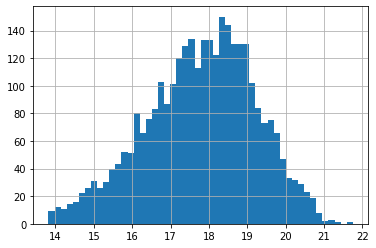

In [5]:
np.log(df.revenue).hist(bins=50)

In [6]:
X = df.drop(columns=["revenue", "keywords", "overview", "title"])
y = np.log(df["revenue"])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.0849965682982745

In [10]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
y_pred = rf.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.0193399129465701

In [12]:
np.std(y_test)

1.4545582113963968

In [13]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [14]:
y_pred = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.0492139117581583

In [15]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df = 0.02)
df = pd.concat([df, pd.DataFrame(tfidf_vectorizer.fit_transform(df["overview"].values.astype("U")).todense(), columns=tfidf_vectorizer.get_feature_names_out())], axis=1)

In [19]:
X = df.drop(columns=["revenue", "keywords", "overview", "title"])
y = np.log(df["revenue"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.1043426386439388